

# Project: Investigate a Dataset - Tmbd movies datasets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue. The columns, from the dataset table, used for the analysis here are listed as thus:
> + `revenue_adj`: The revenue generated by the associated movie in terms of 2010 dollars, accounting for inflation over time.
>+ `id`: Id associated with each move
>+ `popularity`: Indices depicting how popular each movie is
>+ `original_title`: The title of each movie
>+ `runtime`: The time between the starting of the movie upto the end of the credits scene
>+ `vote_count` : The number of time each movie is voted for
>+ `release_year`: The year each movie was released




### Question(s) for Analysis

> **The analysis here attempts to ask and answer the following questions;**
> + Which movie title has the overall highest revenue? 
> + Which movie title generated the highest revenue in 2015?
> + What is the average runtime of movies released in 2015?
> + How many movie titles overall have runtimes above 120 minutes?
> + Which year (from 2010 to 2015) has the higest revenue?
> + What is the correlation relationship between;
    - popularity and vote counts for the entire dataset and for datasets from 2010 to 2015?
    - popularity and revenue for the entire dataset and for datasets from 2010 to 2015?
    - runtime and revenue for the overall?
    - vote_count and revenue for the overall?


In [118]:
# Importing liberaries to be used for analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [119]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [120]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [121]:
#check the shape of dataset
df.shape

(10866, 21)

In [122]:
# dataset at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [123]:
# dataset summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [124]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


+ checking for dubplicates in dataset

In [125]:
# number of duplicated items
df.duplicated().sum()

1

In [126]:
# view duplicated items
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [127]:
# check for number of missing values, if any
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64





### Data Cleaning

In [128]:
# drop columns that are not necessary for the analysis

drop_list = ['budget','revenue','cast','homepage',
              'director','tagline','keywords','overview',
              'production_companies','release_date','vote_average','imdb_id','budget_adj','genres']
df.drop(drop_list, axis=1, inplace = True)
df.head()

,id,popularity,original_title,runtime,vote_count,release_year,revenue_adj
0,135397,32.985763,Jurassic World,124,5562,2015,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,6185,2015,3.481613e+08
2,262500,13.112507,Insurgent,119,2480,2015,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,5292,2015,1.902723e+09
4,168259,9.335014,Furious 7,137,2947,2015,1.385749e+09


In [129]:
# data summary of relevant columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
release_year      10866 non-null int64
revenue_adj       10866 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 594.4+ KB


In [130]:
# Number of missing values in the relevant columns
df.isnull().sum()

id                0
popularity        0
original_title    0
runtime           0
vote_count        0
release_year      0
revenue_adj       0
dtype: int64

* There's no missing values in the columns relevant for the analysis

In [131]:
# check for duplicates
df.duplicated().sum()

1

+ There's only one duplicated row

In [132]:
# drop duplicate and recheck for duplicate
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [133]:
# rename revenue_adj column to revenue
df.rename({'revenue_adj':'revenue'}, axis=1, inplace = True)
df.head(1)

,id,popularity,original_title,runtime,vote_count,release_year,revenue
0,135397,32.985763,Jurassic World,124,5562,2015,1.392446e+09


In [134]:
# round popularity and revenue columns and convert to in data types
cols_round = ['popularity','revenue']
df[cols_round] = df[cols_round].round(0).astype(int)
df.head(1)

,id,popularity,original_title,runtime,vote_count,release_year,revenue
0,135397,33,Jurassic World,124,5562,2015,1392445893


In [135]:
# investigate datatypes
df.dtypes

id                 int64
popularity         int64
original_title    object
runtime            int64
vote_count         int64
release_year       int64
revenue            int64
dtype: object

In [136]:
# convert id and release_year columns to string data type and check data types
df['id'] = df['id'].astype(str)
df['release_year'] = df['release_year'].astype(str)
df.dtypes


id                object
popularity         int64
original_title    object
runtime            int64
vote_count         int64
release_year      object
revenue            int64
dtype: object

In [137]:
# set index to id coulumn
df.set_index('id', inplace=True)
df.head(1)

,popularity,original_title,runtime,vote_count,release_year,revenue
id,,,,,,
135397,33,Jurassic World,124,5562,2015,1392445893


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: Which movie title has the overall highest revenue?

In [138]:
# to find the movie title that generated the overall highest revenue

df[df['revenue'].max() == df['revenue']]['original_title']

id
19995    Avatar
Name: original_title, dtype: object

+ **The movie titled 'Avatar' with id '19995' generated the higest revenue overall**

### Research Question 2: Which movie title generated the highest revenue in 2015?

In [139]:
# to answer this question, lets get all the movies with release_date as 2015
df1 = df.query('release_year == "2015"')
df1.head()

,popularity,original_title,runtime,vote_count,release_year,revenue
id,,,,,,
135397,33,Jurassic World,124,5562,2015,1392445893
76341,28,Mad Max: Fury Road,120,6185,2015,348161292
262500,13,Insurgent,119,2480,2015,271619025
140607,11,Star Wars: The Force Awakens,136,5292,2015,1902723130
168259,9,Furious 7,137,2947,2015,1385748801


In [140]:
# The movies title that has the max revenue in 2015
df1[df1['revenue'].max() == df1['revenue']]['original_title']

id
140607    Star Wars: The Force Awakens
Name: original_title, dtype: object

In [141]:
#comparing vote count and revenue in 2015
df1[df1['vote_count'].max() == df1['vote_count']]['original_title']

id
76341    Mad Max: Fury Road
Name: original_title, dtype: object

+ **The movie "Star Wars: The Force Awakens" with id "140607" has the max revenue in 2015**

### Research Question 3: What is the average runtime of movies released in 2015?

In [142]:
# mean runtime of movies released in 2015
df1['runtime'].mean()

96.3751987281399

+ **96.38 is the mean runtime of movies with release_date as 2015**

### Research Question 4: How many movie titles overall have runtimes above 120 minutes?

In [143]:
# Get the count of movies in the entire dataset with runtime above 120 minutes
len(df.query('runtime >120'))

1580

+ **1580 movies have runtime above 120 minutes**

 ### Research Question 5: Which year (from 2010 to 2015) has the higest revenue?

In [144]:
# get all the movies with release_year from 2010 to 2015
df2 = df.query('release_year in ("2010","2011","2012","2013","2014","2015")')
df2.head()

,popularity,original_title,runtime,vote_count,release_year,revenue
id,,,,,,
135397,33,Jurassic World,124,5562,2015,1392445893
76341,28,Mad Max: Fury Road,120,6185,2015,348161292
262500,13,Insurgent,119,2480,2015,271619025
140607,11,Star Wars: The Force Awakens,136,5292,2015,1902723130
168259,9,Furious 7,137,2947,2015,1385748801


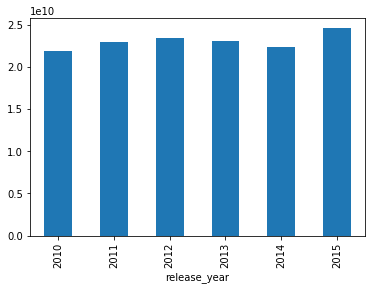

In [145]:
# group by release_year, sum of revenue per year and plot bar graph
df2.groupby('release_year').revenue.sum().plot(kind = 'bar');

+ **From the bar graph above, it is seen that - from 2010 to 2015, year 2015 has the highest revenue generated**

## Investigating correlation relationships between dataset items

  ### Research Question 6: What is the correlation relationship between;
>+ popularity and vote counts for the entire dataset and for datasets from 2010 to 2015?
>- popularity and revenue for the entire dataset and for datasets from 2010 to 2015?
>- runtime and revenue for the overall?
>- vote_count and revenue for the overall?

In [146]:
# get the correlation for the enter dataset

df.corr()

,popularity,runtime,vote_count,revenue
popularity,1.000000,0.138120,0.773622,0.596940
runtime,0.138120,1.000000,0.163273,0.175668
vote_count,0.773622,0.163273,1.000000,0.707941
revenue,0.596940,0.175668,0.707941,1.000000


In [147]:
# get the correlation for dataset from 2010 t0 2015
df.corr()

,popularity,runtime,vote_count,revenue
popularity,1.000000,0.138120,0.773622,0.596940
runtime,0.138120,1.000000,0.163273,0.175668
vote_count,0.773622,0.163273,1.000000,0.707941
revenue,0.596940,0.175668,0.707941,1.000000


- **It is seen the correlation is same for both dataset**

## Applying visualization to investigate the correlation


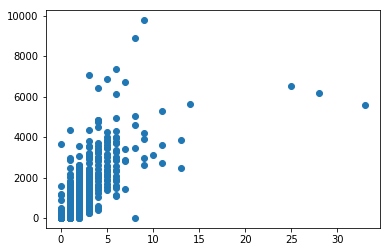

In [148]:
# popularity and vote counts for the entire dataset and for datasets from 2010 to 2015?
plt.scatter(df2.popularity, df2.vote_count);

+ **there's a strong positive correlation between popularity and vote counts**

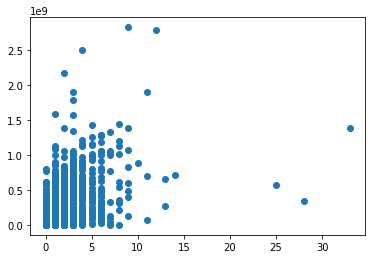

In [149]:
# popularity and revenue for the entire dataset 
plt.scatter(df.popularity, df.revenue);

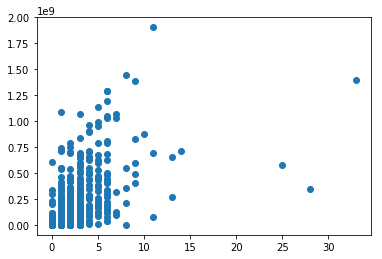

In [150]:
# and for datasets from 2010 to 2015?
plt.scatter(df2.popularity, df2.revenue);

+ **The correlation between popularity and revenue for the 2 datasets are postive and approximately the same**

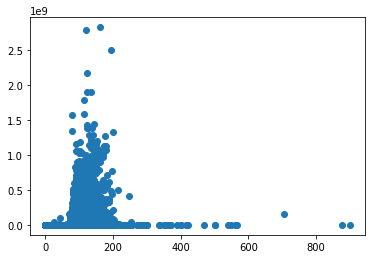

In [151]:
# runtime and revenue for the overall
plt.scatter(df.runtime, df.revenue);

+ **A very weak positive correlation exist between runtime and revenue**

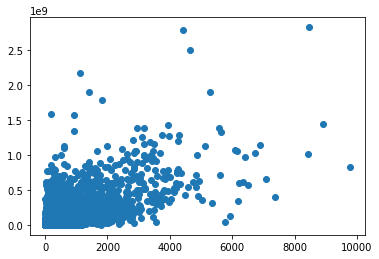

In [152]:
# vote_count and revenue for the overall
plt.scatter(df.vote_count, df.revenue);

+ **There exists a strong positive correlation between vote_count and revenue**

<a id='conclusions'></a>
## Conclusions
> From the analysis so far, a very strong positive correlation exist between vote count and revenue although there is no proof that vote count and revenue have a direct proportion relationship. A query of the dataset for release year from 2010 to 2015 shows that 2015 has the highest revenue. The trend shown in the plot below shows that higest vote count does not necessarily imply highest revenue. It is shown that between  2010 and 2015 release years, highest revenue is in 2015 while highest vote count is in 2013.
> + There is need for additional research, and more information (data) to determine what exacly drives revenue growth for the dataset used here.

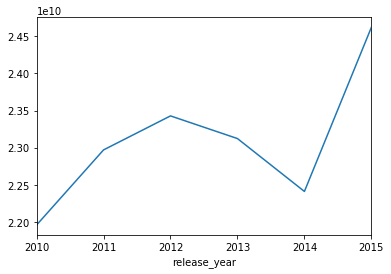

In [153]:
#trend in revenue for dataset from 2010 to 2015
df2.groupby('release_year').revenue.sum().plot(kind = 'line');

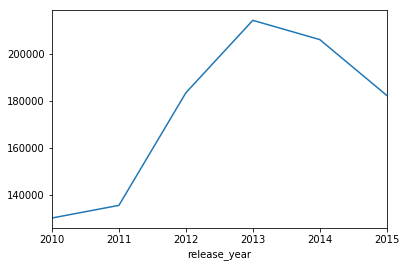

In [154]:
#trend in revenue for dataset from 2010 to 2015
df2.groupby('release_year').vote_count.sum().plot(kind = 'line');

> One **limitation** encountered here is the inability to ascertain the exact driver of revenue, probably due to need for more data specific to revenue generation.

## Acknowledgement

> The analysis was not possible without knowledge and code examples gotten from
+ Udacity nanodegrees classroom - [Project workflow](https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/306f0239-bb80-45c6-bf45-37ee745a63d6/lessons/ls0526/concepts/f41d3e13-9bbc-45a7-8e7e-14f9e5ba1607).
+ [Pandas documentation](https://pandas.pydata.org/docs/).
+ [Stackoverflow](https://stackoverflow.com/)
+ [sparkbyexamples}](https://sparkbyexamples.com/pandas/pandas-dataframe-query-examples/)


## Submitting  Project

In [155]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0